In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
dataset = pd.read_csv('/content/data.csv')

In [5]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [7]:
dataset.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
dataset.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [9]:
data = dataset.drop(axis=0, columns=['date','sqft_lot','waterfront', 'view', 'condition', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city','statezip', 'country','floors'])


In [10]:
data.head()

,price,bedrooms,bathrooms,sqft_living
0,313000.0,3.0,1.50,1340
1,2384000.0,5.0,2.50,3650
2,342000.0,3.0,2.00,1930
3,420000.0,3.0,2.25,2000
4,550000.0,4.0,2.50,1940


In [11]:
data.shape

(4600, 4)

In [12]:
features = data[['bedrooms','bathrooms','sqft_living']]
target = data['price']

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.25, random_state=41)

In [14]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(xtrain,ytrain)
scale.transform(xtest)


array([[-0.42937902,  0.11810978, -0.66241947],
       [-0.42937902, -0.51857576,  0.20583269],
       [-0.42937902,  0.43645255, -0.20762072],
       ...,
       [-0.42937902, -0.51857576, -0.72443749],
       [ 0.65985452,  0.43645255,  0.62962243],
       [-1.51861255, -1.47360406, -1.27226325]])

In [15]:
from sklearn.linear_model import LassoCV
lr = LassoCV(fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, positive=False, random_state=None, selection='cyclic')

In [16]:
lr.fit(xtrain,ytrain)

LassoCV(precompute=False)

In [17]:
ypred = lr.predict(xtest)

In [18]:
ypred[:5]

array([402793.30686457, 605953.96280315, 509210.79330859, 569675.27424269,
       562419.5365306 ])

In [19]:
from sklearn.metrics import mean_squared_error

mean_squared_error(ypred,ytest)


92819416101.2122

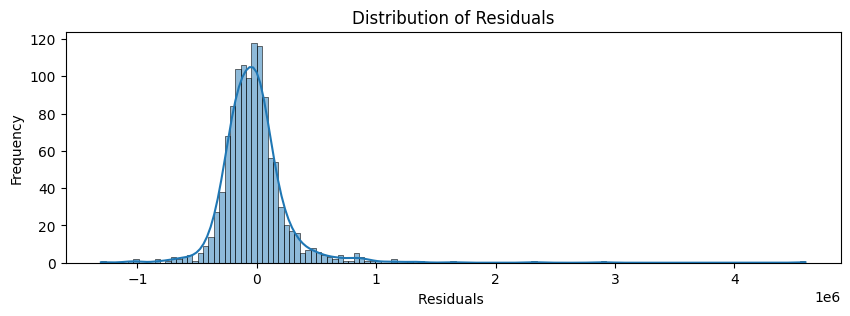

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = ytest - ypred

plt. figure (figsize=(10, 3))
sns.histplot(residuals, kde=True)
plt.xlabel ('Residuals ')
plt.ylabel ('Frequency')
plt.title ('Distribution of Residuals')
plt.show()

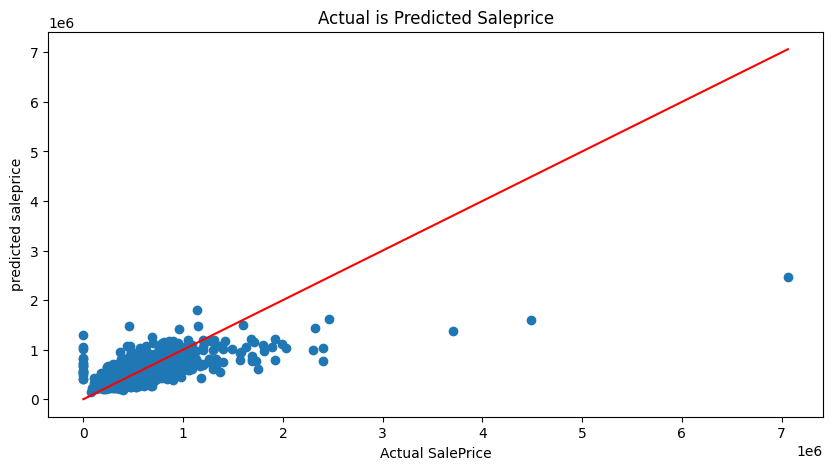

In [29]:
plt.figure(figsize=(10, 5))
plt.scatter(ytest, ypred)
plt.xlabel ('Actual SalePrice')
plt.ylabel('predicted saleprice')
plt.title('Actual is Predicted Saleprice')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(ytest,ypred)*100)

33.97592375695129
